In [1]:
import numpy as np

def dist(x,y):
  return sum([abs(x[i]-y[i]) for i in range(len(x))])

def jacobi( A , b , max_iter=1000 , x0 = None , tol = 1.0e-5):
  '''Método de Jacobi no sistema Ax=b'''

  n = len(A)
  if (x0 == None):
    x0 = [0]*n

  x_new = x0.copy()

  err = 1
  num_iter = 0
  while err>tol and num_iter<max_iter:
    x0 = x_new.copy()
    for i in range(n):
      x_new[i] = (b[i] - sum([A[i][j]*x0[j] for j in range(n) if j != i]))/A[i][i]

    num_iter += 1
    err = dist(x_new , x0)

  if num_iter == max_iter:
    raise Exception("Número máximo de iterações atingido")

  return x_new, num_iter

  


In [2]:
A = [[2, 1], [0, -1]]
b = [1,2]

print(jacobi(A,b))


([1.5, -2.0], 3)


In [3]:
def gauss_seidel( A , b , max_iter= 10**6 , x = None , tol = 1.0e-5):
  '''Método de Jacobi no sistema Ax=b'''

  n = len(A)
  if (x == None):
    x0 = [0]*n
  else :
    x0=x.copy()

  err = 1
  num_iter = 0
  while err>tol and num_iter<max_iter:
    err = 0
    for i in range(n):
      y = ( b[i] - sum([A[i][j]*x0[j] for j in range(i) ])\
                  - sum([A[i][j]*x0[j] for j in range(i+1,n) ]) )\
                  /A[i][i]

      err += abs(x0[i] - y)
      x0[i]=y


    num_iter += 1

  if num_iter == max_iter:
    raise Exception("Número máximo de iterações atingido")

  return x0, num_iter


In [4]:
n=100

A = np.random.randint(low=-3,high=3,size=(n,n))
for i in range(n):
  A[i][i] = 100

b = np.random.randint(low=-10,high=10,size=n)

print (A)


print(jacobi(A,b))
print(gauss_seidel(A,b))

x = np.array(gauss_seidel(A,b)[0]).reshape(n,1)

print(f"b={b}")
print(f"Ax={A@x}")


[[100  -3   0 ...  -3   1   2]
 [  2 100   2 ...   2  -2   0]
 [  1   1 100 ...   1  -1   1]
 ...
 [  0  -2   0 ... 100   2  -2]
 [ -1   1   1 ...   2 100   2]
 [  2   1   1 ...  -1  -2 100]]
([0.001744089617434872, -0.09761483617197918, -0.013925524375612874, -0.058328412520757864, 0.07600654867002615, -0.05317802951824656, 0.06676234179447778, 0.010863923753991402, 0.007305693889364362, -0.04424149810238179, -0.042152929061235085, 0.07300382577791784, -0.07453262503147165, -0.07511332056147403, -0.05933727512133736, -0.03154252888538358, -0.03625022669961974, -0.023282045673799132, -0.09479453497164435, -0.04277004939926133, -0.014693308346257396, -0.08724491381120801, -0.10577120635242941, -0.05408022276612833, -0.018047879443335923, 0.04947062748310344, 0.012649472509019117, 0.02728537797147595, -0.030070615862764535, 0.07828871942118532, 0.0008587239230094424, -0.07453497754263878, 0.04236786991659709, 0.041742844390385905, -0.058412804103336526, -0.10278102895105853, 0.0406566656

### Fazendo vários testes e pegando os valores em uma lista

In [12]:
import time
from tqdm import tqdm

dados_gauss_seidel=[]


for i in tqdm(range (1,151)):                       # Fazendo calculo até matrizes de indice 150
    A = np.random.randint(low=-3,high=3,size=(i,i)) # cria uma matriz A de tamanho i para esse laço
    b = np.random.randint(low=-10,high=10,size=i)   # cria uma matriz b de tamanho para esse laço 
    for k in range(i):                              # Força as entradas diagonais a ser maior para poder ser diagonalmente dominante
        A[k][k] = 100

    time_inicio  = time.time()                           # começa o temporizador
    for n in range(10):                                  # executa o codigo calculo 10x:
        gauss_seidel(A,b)[0]                        
    time_fim = time.time()                               # finaliza o tempporizador ao fim do laço for
    dados_gauss_seidel.append([i, (time_fim - time_inicio)/10])          # adiciona o indice e o tempo médio a lista 

dados_gauss_seidel = np.array(dados_gauss_seidel)

for n in range (0, 150):                                 #print dos dados
    print ("ordem: ",int(dados_gauss_seidel[n,0]), " tempo de execução: ", dados_gauss_seidel[n,1])


    



100%|██████████| 150/150 [01:18<00:00,  1.92it/s]

ordem:  1  tempo de execução:  0.0
ordem:  2  tempo de execução:  0.0
ordem:  3  tempo de execução:  0.00010004043579101563
ordem:  4  tempo de execução:  8.821487426757812e-05
ordem:  5  tempo de execução:  6.203651428222656e-05
ordem:  6  tempo de execução:  0.00019941329956054687
ordem:  7  tempo de execução:  0.00014617443084716797
ordem:  8  tempo de execução:  0.00011625289916992188
ordem:  9  tempo de execução:  0.0002775430679321289
ordem:  10  tempo de execução:  0.00027267932891845704
ordem:  11  tempo de execução:  0.0004349231719970703
ordem:  12  tempo de execução:  0.0002795219421386719
ordem:  13  tempo de execução:  0.00035834312438964844
ordem:  14  tempo de execução:  0.0005286931991577148
ordem:  15  tempo de execução:  0.0005439519882202148
ordem:  16  tempo de execução:  0.0007686376571655274
ordem:  17  tempo de execução:  0.0005651712417602539
ordem:  18  tempo de execução:  0.0008301019668579101
ordem:  19  tempo de execução:  0.0007359266281127929
ordem:  20  t

In [34]:
def pot(j):
  def f(x): return x**j
  return f

num_testes=5
Funcoes_teste = [[pot(j) for j in range(k+1)] for k in range(num_testes)]

print(Funcoes_teste)


[[<function pot.<locals>.f at 0x000001F78C493240>], [<function pot.<locals>.f at 0x000001F78C492FC0>, <function pot.<locals>.f at 0x000001F78C492E80>], [<function pot.<locals>.f at 0x000001F78C493100>, <function pot.<locals>.f at 0x000001F78C460AE0>, <function pot.<locals>.f at 0x000001F78C460220>], [<function pot.<locals>.f at 0x000001F78C460180>, <function pot.<locals>.f at 0x000001F78C20B380>, <function pot.<locals>.f at 0x000001F78C20BCE0>, <function pot.<locals>.f at 0x000001F78C20BBA0>], [<function pot.<locals>.f at 0x000001F78C20BB00>, <function pot.<locals>.f at 0x000001F78C20BC40>, <function pot.<locals>.f at 0x000001F78C20BA60>, <function pot.<locals>.f at 0x000001F78C20B920>, <function pot.<locals>.f at 0x000001F78C20B880>]]


## Regressão

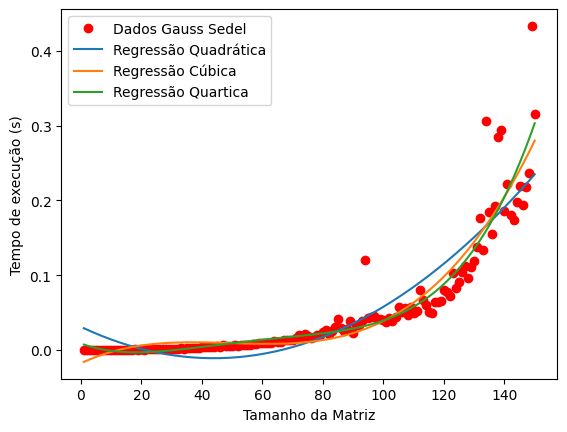

In [39]:
import matplotlib.pyplot as plt

x , y = dados_gauss_seidel[:,0] , dados_gauss_seidel[:,1]
n = len(x)
dom = np.linspace(np.min(x),np.max(x))
ymin=min(y)
ymin=max(y)

# soma_x = np.sum(x)
# soma_y = np.sum(y)
# soma_xy = np.sum(x*y)
# soma_x_squared = np.sum(x**2)

# coef_a = (n * soma_xy - soma_x * soma_y) / (n * soma_x_squared - soma_x**2)
# coef_b = (soma_y - coef_a * soma_x) / n
# linear = coef_a * x + coef_b

# Regressão Quadrática
quadratica = np.polyfit(x, y, 2)
regress_quadratica = quadratica[0] * x**2 + quadratica[1] * x + quadratica[2]

# Regressão Cúbica
cubica = np.polyfit(x, y, 3)
regress_cubica = cubica[0] * x**3 + cubica[1] * x**2 + cubica[2] * x + cubica[3]

# Regressão Quártica
quartica = np.polyfit(x, y, 4)
regress_quartica = quartica[0] * x**4 + quartica[1] * x**3 + quartica[2] * x**2 + quartica[3] * x + quartica[4]

# Plotagem do gráfico
plt.plot(x,y,'ro', label ='Dados Gauss Sedel')
plt.plot(x, regress_quadratica, label='Regressão Quadrática')
plt.plot(x, regress_cubica, label='Regressão Cúbica')
plt.plot(x, regress_quartica, label='Regressão Quartica')
plt.xlabel('Tamanho da Matriz')
plt.ylabel('Tempo de execução (s)')
plt.legend()
plt.show()

Coeficientes obtidos ate grau 1:  [-0.05228018  0.00137993]
Coeficientes obtidos ate grau 2:  [ 3.12077331e-02 -1.91564309e-03  2.18250025e-05]
Coeficientes obtidos ate grau 3:  [-1.76508026e-02  1.90384917e-03 -4.12020042e-05  2.78264930e-07]
Coeficientes obtidos ate grau 4:  [ 8.85719506e-03 -1.50529304e-03  5.96092109e-05 -7.57948506e-07
  3.43117032e-09]


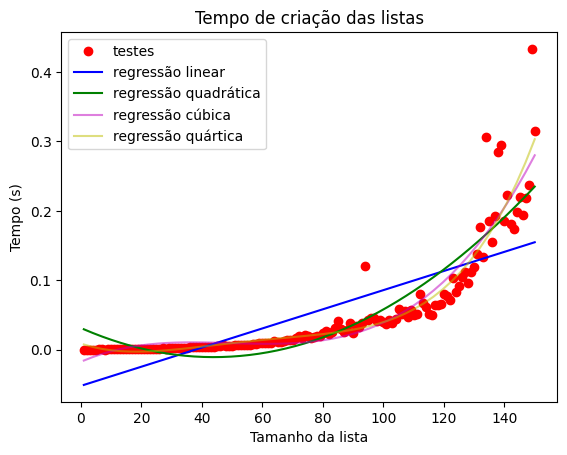

In [24]:
x , y = np.array(dados_gauss_seidel[:,0]) , np.array(dados_gauss_seidel[:,1])
m = len(x)
dom = np.linspace(np.min(x),np.max(x))
ymin=min(y)
ymax=max(y)

coef=np.zeros((5,5))

plt.plot(x,y,'ro')

def pot(j):
  def f(x): return x**j
  return f

num_testes=5
Funcoes_teste = [[pot(j) for j in range(k+1)] for k in range(num_testes)]

for k in range(1,num_testes):
  M = np.array([[Funcoes_teste[k][j](x[i]) for j in range(k + 1)]
                for i in range(m)])
  #Resolve M^tM*alpha = M^ty por escalonamento
  alpha = np.linalg.solve(M.transpose() @ M, M.transpose() @ y)
  print(f"Coeficientes obtidos grau {k}: ", alpha)

  for l in range (0,k+1):
    coef[k,l]=alpha[l]
    
  fun_aproximada = lambda x : sum(\
      [alpha[j]*Funcoes_teste[k][j](x) for j in range(k+1)]\
    )
  ran = [fun_aproximada(t) for t in dom]
  ymin=min([ymin]+ ran)
  ymax=max([ymax]+ ran)


ran1 = [coef[1,0] + coef[1,1]*t for t in dom]

plt.plot(dom, ran1, 'b')

ran2 = [coef[2,0] + coef[2,1]*t + coef[2,2]*t*t for t in dom]
plt.plot(dom, ran2, 'g')

ran3 = [coef[3,0] + coef[3,1]*t + coef[3,2]*t*t + coef[3,3]*t*t*t for t in dom]
plt.plot(dom, ran3, 'm', alpha=0.5)

ran4 = [coef[4,0] + coef[4,1]*t + coef[4,2]*t*t + coef[4,3]*t*t*t + coef [4,4]*t*t*t*t for t in dom]
plt.plot(dom, ran4, 'y', alpha=0.5)

#observação : a curva de grau 3 e de grau 4 praticamente se sobrepõem, significando que os ajustes são pouco significativos após o terceiro grau


plt.title("Tempo de criação das listas")
plt.xlabel("Tamanho da lista")
plt.ylabel("Tempo (s)")
plt.legend(['testes', 'regressão linear', 'regressão quadrática','regressão cúbica','regressão quártica'], loc=2)
plt.show()




